Plotting image

In [9]:
import nibabel as nb
import matplotlib.pyplot as plt

path = r"C:\Users\reeba\OneDrive\Desktop\Work\Coding\Python\Miscallaneous\sub-65304_ses-2_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii"

image=nb.load(path)

image_data=image.get_fdata()



In [10]:
image_data.shape


(256, 384, 384)

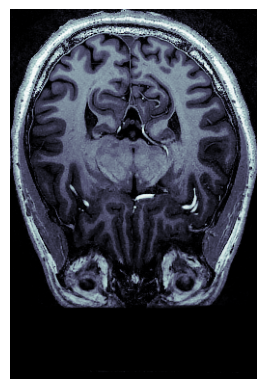

In [16]:

img=image_data[:,:,image_data.shape[2]//2]

plt.imshow(img.T,cmap='bone')
plt.axis('off')
plt.show()

Preprocessing 

In [28]:
import torchio as tio
import subprocess

out_path = r"C:\Users\reeba\OneDrive\Desktop\Work\Coding\Python\Miscallaneous\outputs\processed_image.nii.gz"

result = subprocess.run([
    "hd-bet",
    "-i", path,
    "-o", out_path,
    "-device", "cpu"
], capture_output=True, text=True)

print("STDOUT:", result.stdout)
print("STDERR:", result.stderr)

STDOUT: 
########################
If you are using hd-bet, please cite the following papers:

Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificial neural networks. arXiv preprint arXiv:1901.11341, 2019.

Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
########################

perform_everything_on_device=True is only supported for cuda devices! Setting this to False
There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict
nnUNet_raw is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot

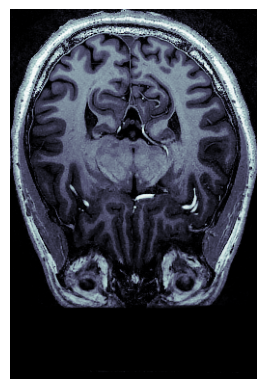

In [32]:
processed_image_1= nb.load(r"C:\Users\reeba\OneDrive\Desktop\Work\Coding\Python\Miscallaneous\outputs\processed_image.nii\processed_image.nii")
processed_image_1_data=processed_image_1.get_fdata()
processed_im_1= img=image_data[:,:,image_data.shape[2]//2]

plt.imshow(processed_im_1.T,cmap='bone')
plt.axis('off')
plt.show()


Comparing

C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\1877006354.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\1877006354.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


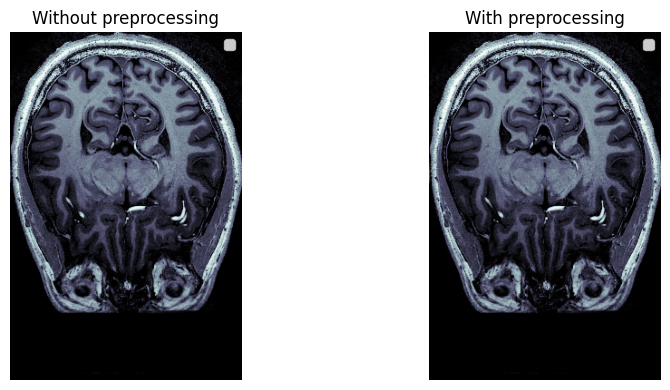

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img.T,cmap='bone')
plt.title('Without preprocessing')
plt.axis('off')
plt.legend()

plt.subplot(1,2,2)
plt.imshow(processed_im_1.T,cmap='bone')
plt.title('With preprocessing')
plt.axis('off')
plt.legend()

plt.tight_layout()
plt.show()


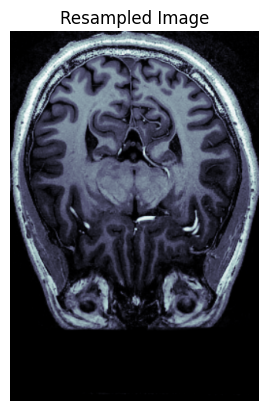

In [41]:
subject = tio.Subject(
    mri= tio.ScalarImage(path)
)

preprocess = tio.Resample((0.5,0.5,0.5))

preprocessed=preprocess(subject)

preprocessed_image_2 = preprocessed['mri'].data.squeeze().numpy()

# Visualize the middle axial slice
middle = resampled_image.shape[2] // 2
plt.imshow(preprocessed_image_2[:, :, middle].T, cmap='bone')
plt.title('Resampled Image')
plt.axis('off')
plt.show()

Comparing again

C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\2032502965.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\2032502965.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


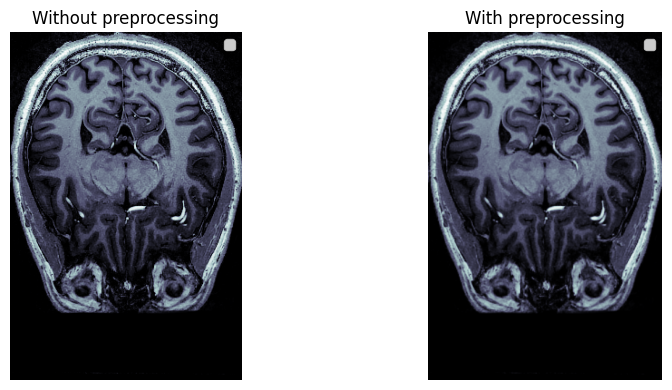

In [44]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img.T,cmap='bone')
plt.title('Without preprocessing')
plt.axis('off')
plt.legend()

plt.subplot(1,2,2)
plt.imshow(preprocessed_image_2[:, :, middle].T,cmap='bone')
plt.title('With preprocessing')
plt.axis('off')
plt.legend()

plt.tight_layout()
plt.show()


CropOrPad

In [54]:
img.shape


(256, 384)

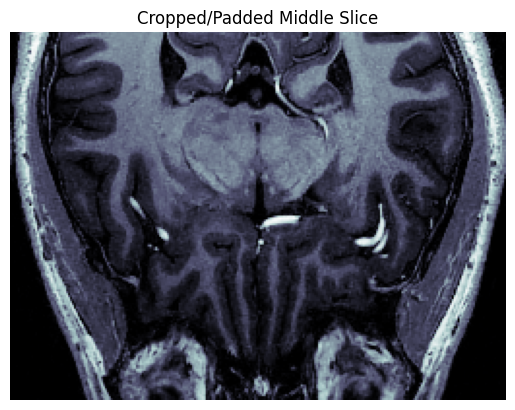

In [67]:
croporpad = tio.Subject(
    mri=tio.ScalarImage(path)
)

crop_or_pad=tio.CropOrPad((256,190,250))

processed_image_3= crop_or_pad(croporpad)

processed_im_3 = processed_image_3['mri'].data.squeeze().numpy()

middle = processed_im_3.shape[2]//2

plt.imshow(processed_im_3[:, :, middle].T, cmap='bone')
plt.title('Cropped/Padded Middle Slice')
plt.axis('off')
plt.show()


C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\3521581054.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\reeba\AppData\Local\Temp\ipykernel_6324\3521581054.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


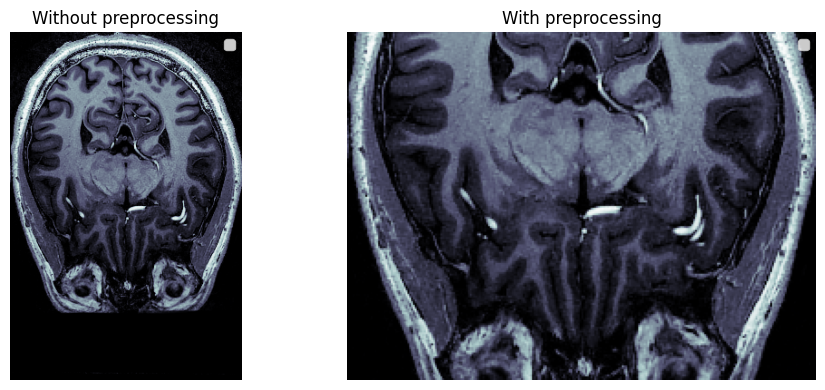

In [68]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img.T,cmap='bone')
plt.title('Without preprocessing')
plt.axis('off')
plt.legend()

plt.subplot(1,2,2)
plt.imshow(processed_im_3[:, :, processed_im_3.shape[2]//2].T,cmap='bone')
plt.title('With preprocessing')
plt.axis('off')
plt.legend()

plt.tight_layout()
plt.show()


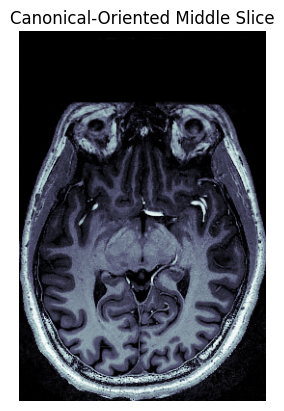

In [69]:
subject = tio.Subject(mri=tio.ScalarImage(path))

# Apply ToCanonical
to_canonical = tio.ToCanonical()
canonical_subject = to_canonical(subject)

# Extract the canonical image as numpy array
canonical_image = canonical_subject['mri'].data.squeeze().numpy()

# Visualize the middle axial slice
middle = canonical_image.shape[2] // 2
plt.imshow(canonical_image[:, :, middle].T, cmap='bone', origin='lower')
plt.title('Canonical-Oriented Middle Slice')
plt.axis('off')
plt.show()

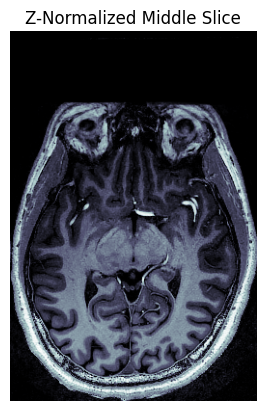

In [71]:
subject = tio.Subject(mri=tio.ScalarImage(path))

# Apply ZNormalization (voxel-wise mean=0, std=1)
z_norm = tio.ZNormalization()
normalized_subject = z_norm(subject)

# Extract normalized image as NumPy array
normalized_img = normalized_subject['mri'].data.squeeze().numpy()

# Visualize the middle axial slice
middle = normalized_img.shape[2] // 2
plt.imshow(normalized_img[:, :, middle].T, cmap='bone', origin='lower')
plt.title('Z-Normalized Middle Slice')
plt.axis('off')
plt.show()